<a href="https://colab.research.google.com/github/MohammadRaziei/Deep-Learning-Course/blob/master/HW03/Q6/HW03_Q6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW03 


## PART A

load `MNIST` dataset

train.shape:  (60000, 28, 28)   ,test.shape:  (10000, 28, 28)


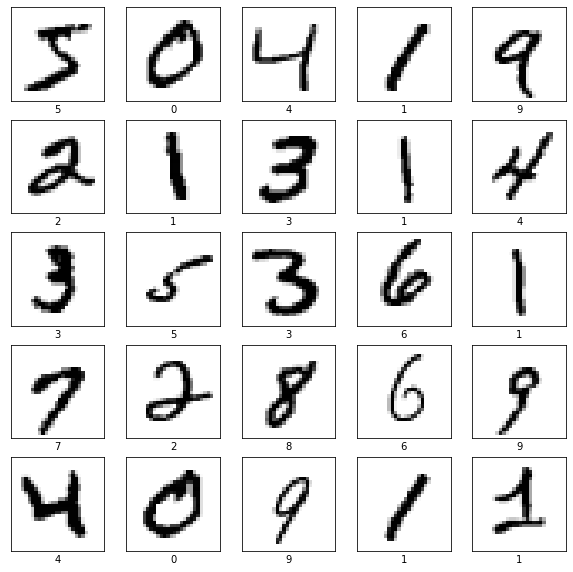

Data is loaded successfully :)


In [2]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(37) #dont change this line



(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('train.shape: ', x_train.shape, '  ,test.shape: ', x_test.shape)


plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(str(y_train[i]))
plt.show()

print('Data is loaded successfully :)')

In [42]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy, BinaryCrossentropy, CategoricalCrossentropy, MeanSquaredError
#%% for CCE


data_train = x_train.reshape((x_train.shape[0],-1))/255
data_test = x_test.reshape((x_test.shape[0],-1))/255

data_dim = data_train.shape[1];

### Shallow fullyConnected layer

In [87]:
# Make encoder:
encoder_input = Input(shape=(data_dim))
encoded = Dense(60, activation="sigmoid")(encoder_input)
encoder_model = Model(encoder_input, encoded)

# Make decoder:
decoder_input = Input(shape=encoded.shape)
decoded  = Dense(data_dim, activation="sigmoid")(decoder_input)
decoder_model = Model(decoder_input, decoded)

# Make autoencoder:
ae_input = Input(shape=(data_dim))
ae_encoded = encoder_model(ae_input)
ae_decoded = decoder_model(ae_encoded)
autoencoder_model = Model(inputs=ae_input, outputs=ae_decoded)

autoencoder_model.compile(optimizer='adam', 
              loss=MeanSquaredError(), 
              metrics=['accuracy'])

history = autoencoder_model.fit(data_train, 
                    data_train,
                    batch_size=64,
                    epochs=20,
                    verbose=2,
                    validation_data=(data_test,data_test)
                    )


Epoch 1/20
938/938 - 4s - loss: 584.6074 - accuracy: 0.0071 - val_loss: 561.1310 - val_accuracy: 0.0084
Epoch 2/20
938/938 - 4s - loss: 542.6047 - accuracy: 0.0110 - val_loss: 543.2407 - val_accuracy: 0.0106
Epoch 3/20
938/938 - 4s - loss: 532.3345 - accuracy: 0.0114 - val_loss: 537.3072 - val_accuracy: 0.0114
Epoch 4/20
938/938 - 4s - loss: 527.7047 - accuracy: 0.0126 - val_loss: 533.7480 - val_accuracy: 0.0107
Epoch 5/20
938/938 - 4s - loss: 524.5609 - accuracy: 0.0121 - val_loss: 531.0466 - val_accuracy: 0.0117
Epoch 6/20
938/938 - 4s - loss: 522.1020 - accuracy: 0.0122 - val_loss: 528.8461 - val_accuracy: 0.0111
Epoch 7/20
938/938 - 4s - loss: 519.9877 - accuracy: 0.0119 - val_loss: 526.8842 - val_accuracy: 0.0095
Epoch 8/20
938/938 - 4s - loss: 518.1791 - accuracy: 0.0127 - val_loss: 525.2377 - val_accuracy: 0.0108
Epoch 9/20
938/938 - 4s - loss: 516.6635 - accuracy: 0.0124 - val_loss: 523.8915 - val_accuracy: 0.0104
Epoch 10/20
938/938 - 4s - loss: 515.4149 - accuracy: 0.0126 - v

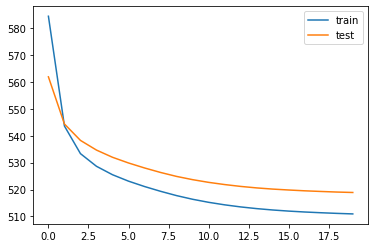

In [86]:
import matplotlib.pyplot as plt
# plot loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [88]:
# plot the autoencoder
tf.keras.utils.plot_model(encoder_model, 'encoder_model.png', show_shapes=True)
encoder_model.save('encoder.h5')
tf.keras.utils.plot_model(decoder_model, 'decoder_model.png', show_shapes=True)
encoder_model.save('decoder.h5')
tf.keras.utils.plot_model(autoencoder_model, 'autoencoder_model.png', show_shapes=True)
encoder_model.save('autoencoder.h5')

In [93]:
import matplotlib.pylab as plt
def plot_image(img, method=None):
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img, cmap=plt.cm.binary)

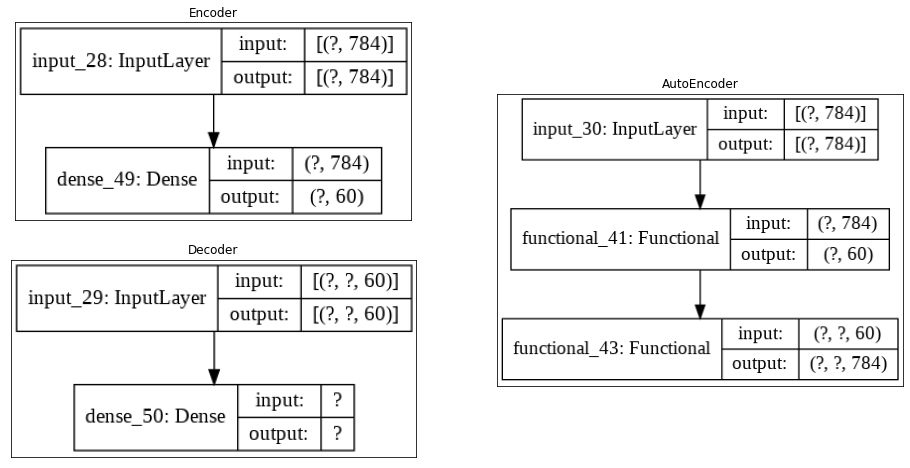

In [140]:
from keras.preprocessing.image import load_img
plt.rcParams['figure.figsize'] = [16, 8]

# Encoder: 
plt.subplot(2,2,1)
plot_image(load_img('encoder_model.png'))
plt.title('Encoder')
# Decoder: 
plt.subplot(2,2,3)
plot_image(load_img('decoder_model.png'))
plt.title('Decoder')
# Autoencoder: 
plt.subplot2grid((2, 2), (0, 1), rowspan=2)
plot_image(load_img('autoencoder_model.png'))
plt.title('AutoEncoder')

# show
plt.show()

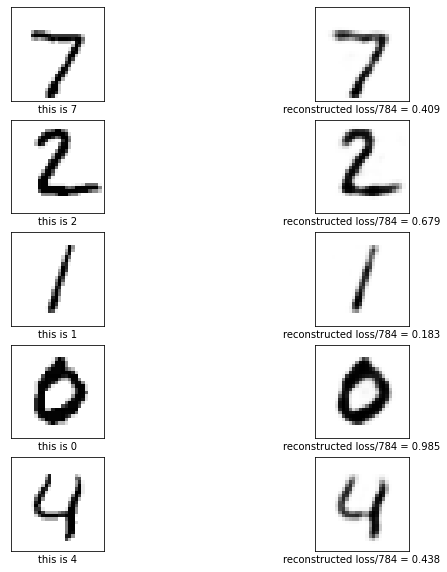

In [120]:
# make prediction on test set
data_reconst = autoencoder_model.predict(data_test).reshape(x_test.shape)
scale = x_test.shape[1]*x_test.shape[2]

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,2,2*i+1)
    plot_image(x_test[i])
    plt.xlabel("this is {}".format(y_test[i]))

    plt.subplot(5,2,2*i+2)
    plot_image(data_reconst[i])
    score, acc = autoencoder_model.evaluate(data_test[i].reshape(1, *data_test[i].shape), data_reconst[i].reshape(1,*data_test[i].shape), verbose=0)
    plt.xlabel("reconstructed loss/{1} = {0:0.3f}".format(score/scale, scale))
plt.show()

In [114]:
i = 1
score, acc = autoencoder_model.evaluate(data_test, data_reconst.reshape(data_test.shape))
score
# data_test[i].shape
# data_reconst[i].reshape(data_test[i].shape).shape

313/313 [==============================] - 0s 1ms/step - loss: 495.6416 - accuracy: 1.0000


495.6416015625